Basics

In [1]:
import numpy as np
import tensorflow as tf

In [ ]:
A = tf.placeholder(tf.float32, shape=(5,5), name='A')
v = tf.placeholder(tf.float32)

In [ ]:
w = tf.matmul(A, v)

In [ ]:
with tf.Session() as session:
    output = session.run(w, feed_dict={A: np.random.randn(5,5), v: np.random.randn(5,1)})
    print(output, type(output))

In [ ]:
shape=(2,2)
x = tf.Variable(tf.random_normal(shape))
t = tf.Variable(0)

In [ ]:
init = tf.initialize_all_variables()

In [ ]:
with tf.Session() as session:
    out = session.run(init)
    print(x.eval())
    print(t.eval())

In [ ]:
u = tf.Variable(20.0)
cost = u*u + u + 1
train_op = tf.train.GradientDescentOptimizer(0.3).minimize(cost)

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as session:
    session.run(init)
    for i in range(12):
        session.run(train_op)
        print("i = %d, cost %.3f, u = %.3f" % (i, cost.eval(), u.eval()))

# Building a neural net in tensorflow

In [ ]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

from util import get_normalized_data, y2indicator

In [ ]:
def error_rate(p, t):
    return np.mean(p != t)

In [ ]:
X, Y = get_normalized_data()

max_iter = 15
print_period = 10

lr = 0.00004
reg = 0.01

Xtrain = X[:-1000,]
Ytrain = Y[:-1000]
Xtest  = X[-1000:,]
Ytest  = Y[-1000:]
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)


N, D = Xtrain.shape
batch_sz = 500
n_batches = N // batch_sz

# add an extra layer just for fun
M1 = 300
M2 = 25
K = 10
W1_init = np.random.randn(D, M1) / 28
b1_init = np.zeros(M1)
W2_init = np.random.randn(M1, M2) / np.sqrt(M1)
b2_init = np.zeros(M2)
W3_init = np.random.randn(M2, K) / np.sqrt(M2)
b3_init = np.zeros(K)

X = tf.placeholder(tf.float32, shape=(None, D), name='X')
T = tf.placeholder(tf.float32, shape=(None, K), name='T')

W1 = tf.Variable(W1_init.astype(np.float32))
b1 = tf.Variable(b1_init.astype(np.float32))
W2 = tf.Variable(W2_init.astype(np.float32))
b2 = tf.Variable(b2_init.astype(np.float32))
W3 = tf.Variable(W3_init.astype(np.float32))
b3 = tf.Variable(b3_init.astype(np.float32))

In [ ]:
Z1 = tf.nn.relu( tf.matmul(X, W1) + b1 )
Z2 = tf.nn.relu( tf.matmul(Z1, W2) + b2 )
Yish = tf.matmul(Z2, W3) + b3 # still needs to have softmax taken

cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(Yish, T))

train_op = tf.train.RMSPropOptimizer(lr, decay=0.99, momentum=0.9).minimize(cost)

predict_op = tf.argmax(Yish, 1)

LL = []
init = tf.global_variables_initializer()

In [ ]:
max_iter = 1

with tf.Session() as session:
    session.run(init)
    
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            
            session.run(train_op, feed_dict={X: Xbatch, T: Ybatch})
            if j == 0:
                test_cost = session.run(cost, feed_dict={X: Xtest, T: Ytest_ind})
                prediction = session.run(predict_op, feed_dict={X: Xtest})
                err = error_rate(prediction, Ytest)
                print("Cost / err at iteration i%d, j=%d: %.3f / %.3f" % (i, j, test_cost, err))
                LL.append(test_cost)

In [ ]:
plt.plot(LL)
plt.show()

## Again

In [ ]:
X, Y = get_normalized_data()

max_iter = 15
print_period = 10

lr = 0.00004
reg = 0.01

Xtrain = X[:-1000,]
Ytrain = Y[:-1000]
Xtest  = X[-1000:,]
Ytest  = Y[-1000:]
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)

N, D = Xtrain.shape
batch_sz = 500
n_batches = N // batch_sz

# add an extra layer just for fun
M1 = 300
M2 = 100
K = 10
W1_init = np.random.randn(D, M1) / 28
b1_init = np.zeros(M1)
W2_init = np.random.randn(M1, M2) / np.sqrt(M1)
b2_init = np.zeros(M2)
W3_init = np.random.randn(M2, K) / np.sqrt(M2)
b3_init = np.zeros(K)

# Make those juicy tensorflow variables
X = tf.placeholder(tf.float32, shape=(None, D), name='X')
T = tf.placeholder(tf.float32, shape=(None, K), name='T')
W1 = tf.Variable(W1_init.astype(np.float32))
b1 = tf.Variable(b1_init.astype(np.float32))
W2 = tf.Variable(W2_init.astype(np.float32))
b2 = tf.Variable(b2_init.astype(np.float32))
W3 = tf.Variable(W3_init.astype(np.float32))
b3 = tf.Variable(b3_init.astype(np.float32))

In [ ]:
Z1 = tf.nn.relu( tf.matmul(X, W1) + b1 )
Z2 = tf.nn.relu( tf.matmul(Z1, W2) + b2 )
Yish = tf.matmul(Z2, W3) + b3

cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(Yish, T))

train_op = tf.train.RMSPropOptimizer(lr, decay=0.99, momentum=0.9).minimize(cost)

predict_op = tf.argmax(Yish, 1)

LL = []
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as session:
    session.run(init)
    
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            
            session.run(train_op, feed_dict={X: Xbatch, T: Ybatch})
            if j % print_period == 0:
                test_cost = session.run(cost, feed_dict={X: Xtest, T: Ytest_ind})
                prediction = session.run(predict_op, feed_dict={X: Xtest})
                err = error_rate(prediction, Ytest)
                print("Cost / err at iteration i=%d, j=%d: %.3f / %.3f" % (i, j, test_cost, err))
                LL.append(test_cost)

In [ ]:
plt.plot(LL)
plt.show()

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
A = tf.placeholder(tf.float32, shape=(5,5), name='A')
v = tf.placeholder(tf.float32)

In [3]:
w = tf.matmul(A, v)

In [7]:
with tf.Session() as session:
    output = session.run(w, feed_dict={A: np.random.randn(5,5), v: np.random.randn(5,1)})
    print(output, type(output))

[[-1.96586955]
 [-1.9308424 ]
 [ 0.87464499]
 [-0.52165335]
 [ 3.16263342]] <class 'numpy.ndarray'>


In [8]:
shape=(2,2)
x = tf.Variable(tf.random_normal(shape))
t = tf.Variable(0)

In [21]:
init = tf.global_variables_initializer()

In [10]:
with tf.Session() as session:
    out = session.run(init)
    print(x.eval())
    print(t.eval())

[[-0.12997872  0.71027607]
 [-0.59503478 -1.4634949 ]]
0


In [33]:
u = tf.Variable(20.0)
cost = u*u + u + 1
train_op = tf.train.GradientDescentOptimizer(0.3).minimize(cost)

In [34]:
init = tf.global_variables_initializer()

In [35]:
with tf.Session() as session:
    session.run(init)
    for i in range(12):
        session.run(train_op)
        print(" i = %d, cost %.3f, u = %.3f" % (i, cost.eval(), u.eval()))

 i = 0, cost 67.990, u = 7.700
 i = 1, cost 11.508, u = 2.780
 i = 2, cost 2.471, u = 0.812
 i = 3, cost 1.025, u = 0.025
 i = 4, cost 0.794, u = -0.290
 i = 5, cost 0.757, u = -0.416
 i = 6, cost 0.751, u = -0.466
 i = 7, cost 0.750, u = -0.487
 i = 8, cost 0.750, u = -0.495
 i = 9, cost 0.750, u = -0.498
 i = 10, cost 0.750, u = -0.499
 i = 11, cost 0.750, u = -0.500


# Building a neural net in tensorflow

In [37]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

from util import get_normalized_data, y2indicator

def error_rate(p, t):
    return np.mean(p != t)

In [55]:
X, Y = get_normalized_data()

Reading in and transforming data...


In [56]:
max_iter = 15
print_period = 10

lr = 0.00004
reg = 0.01

Xtrain = X[:-1000,]
Ytrain = Y[:-1000]
Xtest  = X[-1000:,]
Ytest  = Y[-1000:]
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)

N, D = Xtrain.shape
batch_sz = 500
n_batches = N // batch_sz

# Add an extra layer just for fun
M1 = 300
M2 = 100
K = 10
W1_init = np.random.randn(D, M1) / 28
b1_init = np.zeros(M1)
W2_init = np.random.randn(M1, M2) / np.sqrt(M1)
b2_init = np.zeros(M2)
W3_init = np.random.randn(M2, K) / np.sqrt(M2)
b3_init = np.zeros(K)

/Users/admin/Code/udemy_courses/udemy_lazyprogrammer_courses/4_practical_deep_learning_tensorflow/util.py:104: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ind[i, y[i]] = 1


In [57]:
X = tf.placeholder(tf.float32, shape=(None, D), name='X')
T = tf.placeholder(tf.float32, shape=(None, K), name='T')
W1 = tf.Variable(W1_init.astype(np.float32))
b1 = tf.Variable(b1_init.astype(np.float32))
W2 = tf.Variable(W2_init.astype(np.float32))
b2 = tf.Variable(b2_init.astype(np.float32))
W3 = tf.Variable(W3_init.astype(np.float32))
b3 = tf.Variable(b3_init.astype(np.float32))

In [58]:
Z1 = tf.nn.relu( tf.matmul(X, W1) + b1 )
Z2 = tf.nn.relu( tf.matmul(Z1, W2) + b2 )
Yish = tf.matmul(Z2, W3) + b3

cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(Yish, T))

train_op = tf.train.RMSPropOptimizer(lr, decay=0.99, momentum=0.9).minimize(cost)

predict_op = tf.argmax(Yish, 1)

LL = []
init = tf.global_variables_initializer()

In [59]:
with tf.Session() as session:
    session.run(init)
    
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            
            session.run(train_op, feed_dict={X: Xbatch, T: Ybatch})
            if j % print_period == 0:
                test_cost = session.run(cost, feed_dict={X: Xtest, T: Ytest_ind})
                prediction = session.run(predict_op, feed_dict={X: Xtest})
                err = error_rate(prediction, Ytest)
                print("Cost / err at iteration i=%d, j%d, %.3f / %.3f" % (i, j, test_cost, err))
                LL.append(test_cost)

Cost / err at iteration i=0, j0, 2350.984 / 0.930
Cost / err at iteration i=0, j10, 1578.829 / 0.319
Cost / err at iteration i=0, j20, 845.762 / 0.202
Cost / err at iteration i=0, j30, 547.833 / 0.149
Cost / err at iteration i=0, j40, 434.047 / 0.125
Cost / err at iteration i=0, j50, 368.335 / 0.110
Cost / err at iteration i=0, j60, 330.299 / 0.105
Cost / err at iteration i=0, j70, 308.084 / 0.096
Cost / err at iteration i=0, j80, 288.193 / 0.086
Cost / err at iteration i=1, j0, 284.133 / 0.083
Cost / err at iteration i=1, j10, 265.247 / 0.075
Cost / err at iteration i=1, j20, 251.452 / 0.075
Cost / err at iteration i=1, j30, 241.923 / 0.070
Cost / err at iteration i=1, j40, 229.555 / 0.067
Cost / err at iteration i=1, j50, 222.185 / 0.065
Cost / err at iteration i=1, j60, 213.809 / 0.067
Cost / err at iteration i=1, j70, 206.601 / 0.061
Cost / err at iteration i=1, j80, 201.565 / 0.056
Cost / err at iteration i=2, j0, 199.622 / 0.055
Cost / err at iteration i=2, j10, 190.093 / 0.050
C

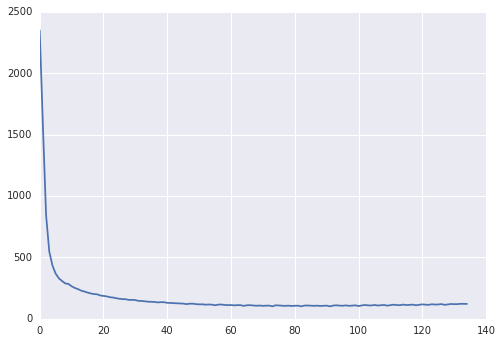

In [63]:
plt.plot(LL)

# Repeat

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
A = tf.placeholder(tf.float32, shape=(5,5), name='A')
v = tf.placeholder(tf.float32)

In [4]:
w = tf.matmul(A, v)

In [ ]:
with tf.Session() as session:
    ooutput